In [6]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt

# GLOBAL SETTINGS
plt.rcParams['xtick.direction'] = 'in' # x axis in
plt.rcParams['ytick.direction'] = 'in' # y axis in 
# plt.rcParams['axes.linewidth'] = 1.0 # axis line width
# plt.rcParams['axes.grid'] = True # make grid


### RC Filter

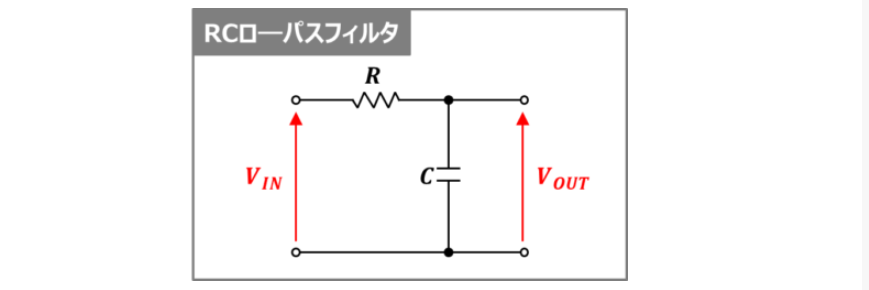

In [167]:
# PARAMS
V = 5  # V
C = 1000 * 10**-12  # F
R = 4.9*10**3  # Ω
f = np.arange(1000, 100*10**6, 1000)  # Hz
t = np.logspace(-9, -3, 1000)  # s
# FUNCTIONS
i = V / R * np.exp(-t / (C*R))

#### i(t)
https://eleking.net/study/s-transient/str-transient-rc.html
$$
i(t) = \frac{E}{R}\cdotp exp\left(-\frac{1}{CR}t\right)
$$

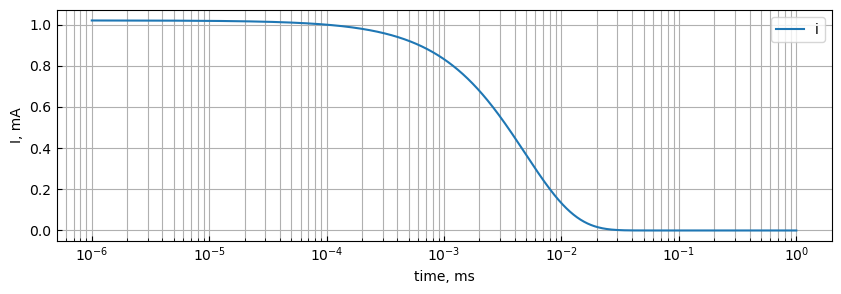

In [168]:
# PLOT
plt.figure(figsize=(10, 3))
plt.plot(t*10**3, i*10**3, label='i')
# plt.yscale('log')
plt.xscale('log')
plt.xlabel('time, ms');plt.ylabel('I, mA')
plt.grid(which='both')
plt.legend()
plt.show()

#### Gain|G(jω)|, Phase, tau
https://detail-infomation.com/rc-low-pass-filter/
$$
G(j\Omega) = \frac{1}{1 + j2\pi fCR} \qquad (1-1) $$
$$         = \frac{1}{1+(\omega CR)^2} - j\frac{\omega CR}{1 + (\Omega CR)^2} \qquad (2-5)
$$
$$
|G(j\Omega)| = \frac{V_{out}}{V_{in}} = \frac{1}{\sqrt{1 + (2\pi fCR)^2}} \qquad (1-2)
$$
$$
\theta = -arctan(2\pi fCR) \qquad (1-4)
$$
$$
v_c(t) = E(1-e^{-\frac{1}{CR}t})
$$

tau: 4.9 us
fc: 32.48 kHz


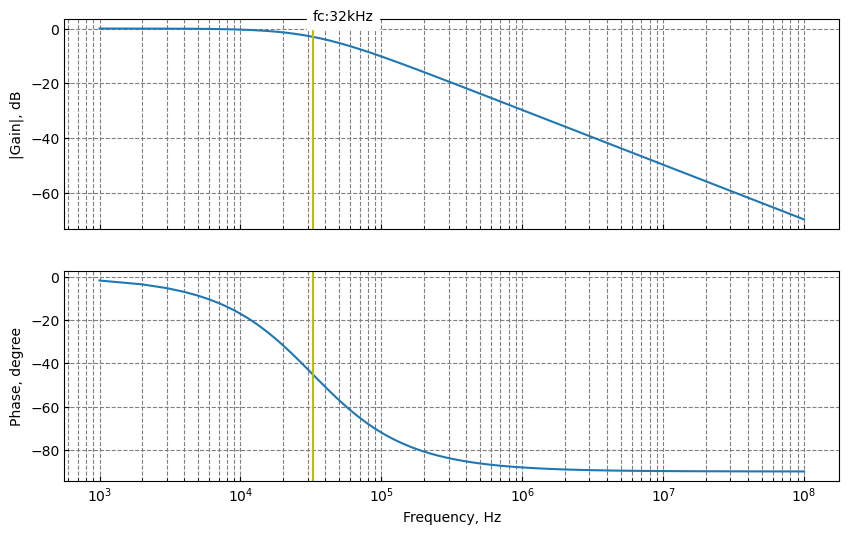

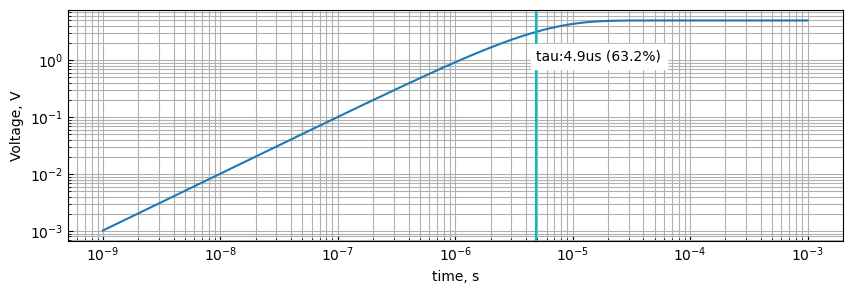

In [162]:
# Gain
gain = 20 * np.log10(1 / np.sqrt(1 + (2 * np.pi * f * C * R)**2))
# Phase
theta = -np.degrees(np.arctan(2 * np.pi * f * C * R))
# cutoff
fc = 1 / (2 * np.pi * C * R)
# tau
vc = V * (1 - np.exp(-t/(C*R)))
tau = R * C

print('tau:', round(tau*10**6, 2), 'us')
print('fc:', round(fc*10**-3, 2), 'kHz')

# PLOT
# Gain
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
plt.xlabel('Frequency, Hz')
ax[0].plot(f, gain)
ax[0].set_ylabel('|Gain|, dB')
plt.xscale('log')
ax[0].grid(which='both',color='gray',linestyle='--')
ax[0].axvline(fc, color='y')
ax[0].text(fc, 3, 'fc:'+str(int(fc*10**-3))+'kHz', backgroundcolor='w')
# Phase
ax[1].plot(f, theta)
ax[1].set_ylabel('Phase, degree')
ax[1].grid(which='both',color='gray',linestyle='--')
ax[1].axvline(fc, color='y')
plt.show()
# tau
plt.figure(figsize=(10, 3))
plt.plot(t, vc)
plt.yscale('log');plt.xscale('log')
plt.xlabel('time, s');plt.ylabel('Voltage, V')
plt.grid(which='both')
plt.axvline(tau, color='c')
plt.text(tau, 1, 'tau:'+str(round(tau*10**6, 2))+'us (63.2%)', backgroundcolor='w')
plt.show()

### RC Parallel
https://denki-no-shinzui.com/transient-rc-p-dc/

回路方程式
$$
\frac{R_0+R}{RC}q + R_0\frac{dq}{dt} = E \qquad (6)
$$

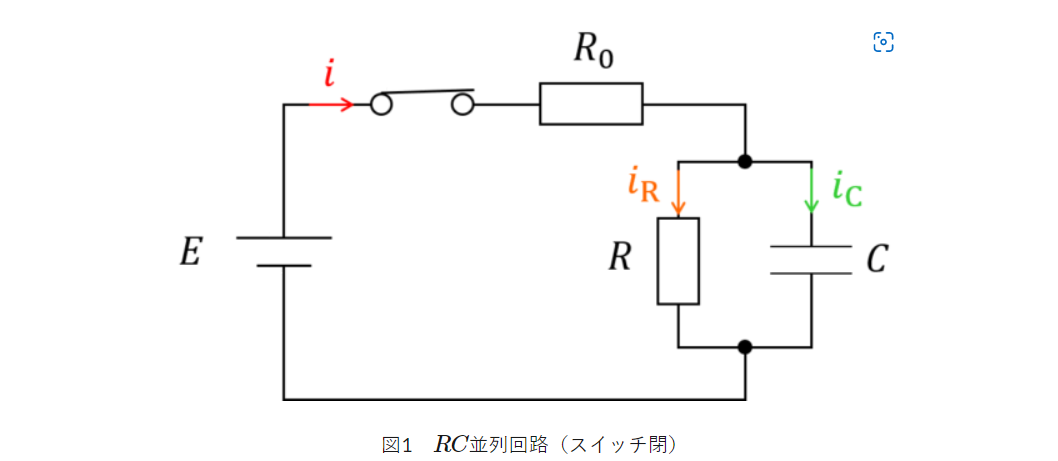

In [169]:
# PARAMS
E = 5  # V
R0 = 4.9*10**3  # Ω
R = 20 * 10**3  # Ω
C = 1000 * 10**-12  # F
# R0 = 10 * 10**3  # Ω
# R = 1 * 10**3  # Ω
# C = 0.01 * 10**-6  # F
f = np.logspace(1, 7, 10_000)  # Hz
t = np.logspace(-9, -4, 1000)  # s
# FUNCTIONS
i_R = E / (R0 + R)*(1 - np.exp(-(R0 + R) * t / (R0 * R * C)))
i_C = E / R0 * np.exp(-(R0 + R) * t / (R0 * R * C))
i_on = E / (R0 * (R0 + R)) * (R0 + R * np.exp(-(R0 + R) / (R0 * R * C) * t))

#### i(t), v(t)
$$
i_on(t) = i_R(t) + i_C(t) = \frac{E}{R0+R}\left(1-exp(-\frac{R_0+R}{R_0RC}t)\right) 
                          + \frac{E}{R_0}exp(-\frac{R_0+R}{R_0RC}t) \qquad (13)(14)$$
$$                        = \frac{E}{R_0(R_0+R)}\left(R_0+R\cdotp exp(-\frac{R_0+R}{R_0RC}t)\right)                                   \qquad (15)
$$
$$
v(t) = Ri_R(t) = \frac{RE}{R_0+R}\left(1 - exp(-\frac{R_0+R}{R_0RC}t)\right) \qquad (16)
$$

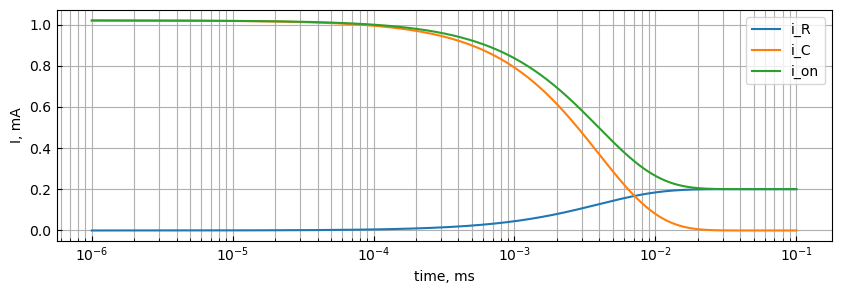

In [160]:
# PLOT
plt.figure(figsize=(10, 3))
plt.plot(t*10**3, i_R*10**3, label='i_R')
plt.plot(t*10**3, i_C*10**3, label='i_C')
plt.plot(t*10**3, i_on*10**3, label='i_on')
# plt.yscale('log')
plt.xscale('log')
plt.xlabel('time, ms');plt.ylabel('I, mA')
plt.grid(which='both')
plt.legend()
plt.show()

#### Gain, Phase
https://detail-infomation.com/rc-low-pass-filter/ <br>
https://www.aps-web.jp/academy/ec/542/
$$
G(j\omega) = \frac{R(R+R_0) - J\omega R^2R_0C}{(R+R_0)^2 + (\omega RR_0C)^2}$$
$$
|G(j\omega)| = \frac{\sqrt{(R(R+R_0))^2 + (\omega R^2R_0C)^2}}{(R+R_0)^2 + (\omega RR_0C)^2}
$$
$$
theta = -arctan\left(\frac{\omega RR_0C}{R+R_0}\right)
$$

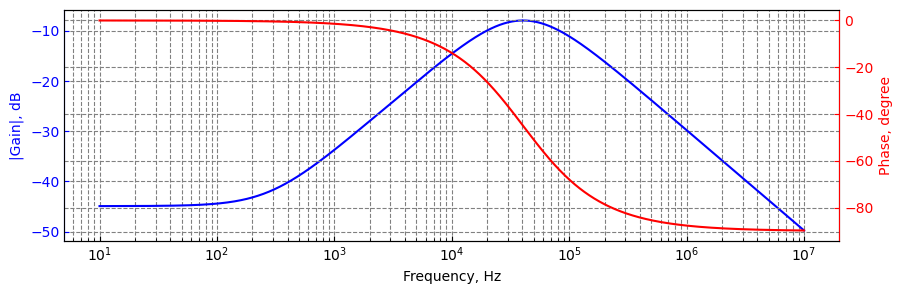

In [170]:
# Gain
gain = 20 * np.log10(np.sqrt(R*(R+R0)**2+(2*np.pi*f*R**2*R0*C)**2) 
                     / ((R+R0)**2+(2*np.pi*f*R*R0*C)**2))
# Phase
theta = np.degrees(-np.arctan((2*np.pi*f*R*R0*C)/(R+R0)))

# PLOT
# Gain
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(10, 3))
ax2 = ax.twinx()
ax.plot(f, gain, color='b')
ax.set_xlabel('Frequency, Hz');ax.set_ylabel('|Gain|, dB')
ax.grid(which='both',color='gray',linestyle='--')
ax.spines['left'].set_color('b')
ax.yaxis.label.set_color('b')
ax.tick_params(axis='y', colors='b')
# Phase
ax2.plot(f, theta, color='r')
ax2.set_ylabel('Phase, degree')
ax2.grid(which='both',color='gray',linestyle='--')
ax2.spines['right'].set_color('r')
ax2.yaxis.label.set_color('r')
ax2.tick_params(axis='y', colors='r')
plt.xscale('log')
plt.show()